In [1]:
import numpy as np
from scipy import stats

In [3]:
###COLOR OF SOCCER GOALKEEPERS' UNIFORMS INFLUENCES THE OUTCOME OF PENALTY KICKS ##
mean_red = 6.90  
std_red =2.42
mean_blue =6.80
std_blue =1.62
mean_green = 6.70
std_green =  1.83
mean_yellow = 6.80  
std_yellow = 1.32


In [4]:
# Calculate Cohen's d for each comparison
d_red_blue = (mean_red - mean_blue) / np.sqrt((std_red**2 + std_blue**2) / 2)
d_red_green = (mean_red - mean_green) / np.sqrt((std_red**2 + std_green**2) / 2)
d_red_yellow = (mean_red - mean_yellow) / np.sqrt((std_red**2 + std_yellow**2) / 2)

In [5]:
# Print the results
print("Cohen's d (Red vs. Blue):", d_red_blue)
print("Cohen's d (Red vs. Green):", d_red_green)
print("Cohen's d (Red vs. Yellow):", d_red_yellow)

Cohen's d (Red vs. Blue): 0.048562002511390104
Cohen's d (Red vs. Green): 0.09322363223097187
Cohen's d (Red vs. Yellow): 0.05130296799846394


In [7]:
import matplotlib.pyplot as plt
# Define the Cohen's d values and confidence intervals
cohen_d_values = [1.12, 1.47, 0.75, 0.25, 0.36, 0.25]


In [9]:
# Define labels for each comparison
comparison_labels =  ["Red vs. Blue", "Red vs. Green", "Red vs. Yellow", "Blue vs. Green", "Blue vs. Yellow", "Green vs. Yellow"]

In [21]:
lower_bounds = [0.87, 1.22, 0.51, 0.16, 0.11, 0.09]
upper_bounds = [1.37, 1.72, 0.99, 0.34, 0.61, 0.42]
error_bar_widths = [(upper - lower) / 2 for lower, upper in confidence_intervals]
y_values = list(range(len(cohen_d_values)))

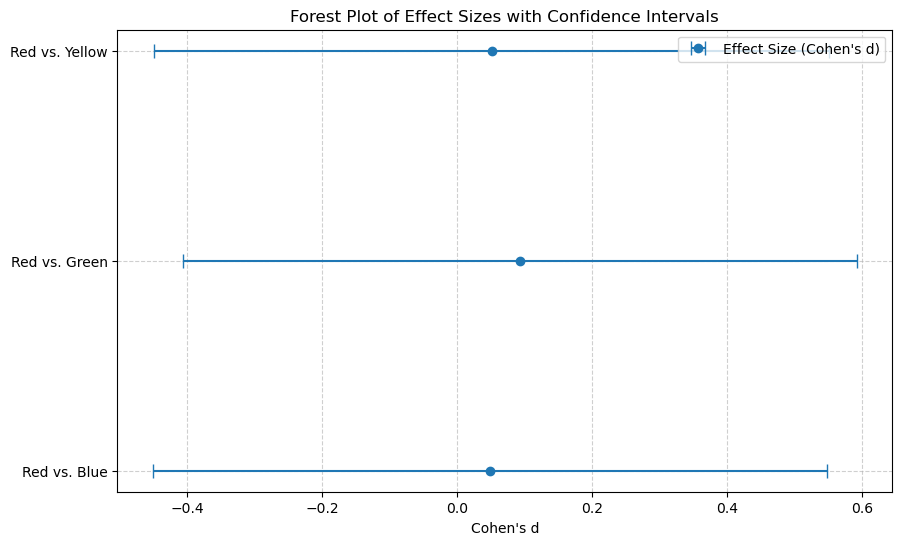

In [22]:
plt.figure(figsize=(10, 6))
plt.errorbar(x=cohen_d_values, y=y_values, xerr=error_bar_widths, fmt='o', capsize=5, label="Effect Size (Cohen's d)")
plt.yticks(y_values, comparison_labels)
plt.xlabel("Cohen's d")
plt.title('Forest Plot of Effect Sizes with Confidence Intervals')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

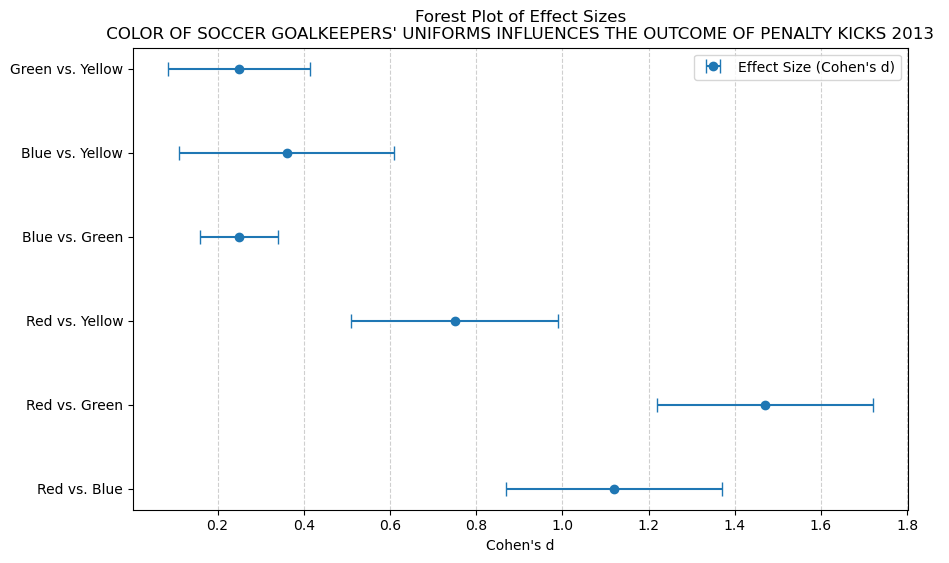

In [9]:
import matplotlib.pyplot as plt

# Example Cohen's d values and confidence intervals
cohen_d_values = [1.12, 1.47, 0.75, 0.25, 0.36, 0.25]
lower_bounds = [0.87, 1.22, 0.51, 0.16, 0.11, 0.09]
upper_bounds = [1.37, 1.72, 0.99, 0.34, 0.61, 0.42]

# Study labels for the forest plot
study_labels = ["Red vs. Blue", "Red vs. Green", "Red vs. Yellow", "Blue vs. Green", "Blue vs. Yellow", "Green vs. Yellow"]
yvalues=range(len(cohen_d_values))
# Create the forest plot
plt.figure(figsize=(10, 6))
plt.errorbar(x=cohen_d_values, y=yvalues, xerr=[(upper_bounds[i] - lower_bounds[i]) / 2 for i in range(len(cohen_d_values))], fmt='o', capsize=5, label="Effect Size (Cohen's d)")
plt.yticks(range(len(study_labels)), study_labels)
plt.xlabel("Cohen's d")
plt.title("Forest Plot of Effect Sizes\n COLOR OF SOCCER GOALKEEPERS' UNIFORMS INFLUENCES THE OUTCOME OF PENALTY KICKS 2013 ")
plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.6)


In [4]:
###second study$%
# Severe penalties data for black jerseys
severe_penalties_black_home = np.array([1.38, 1.33])

# Calculate Cohen's d and confidence interval
d_severe_black_home, _, _ = cohen_d(severe_penalties_black_home, severe_penalties_black_home)
d_severe_black_home




0.0

In [5]:
# Severe penalties data for red jerseys
severe_penalties_red_home = np.array([1.25, 1.30])

# Calculate Cohen's d and confidence interval
d_severe_red_home, _, _ = cohen_d(severe_penalties_red_home, severe_penalties_red_home)
d_severe_red_home

0.0

/var/folders/7c/_5hzyfd12ql7v609krky_grr0000gn/T/ipykernel_20984/2073017170.py:37: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvline(0, color='black', linestyle='--', linewidth=1)  # Add a vertical line at zero for reference


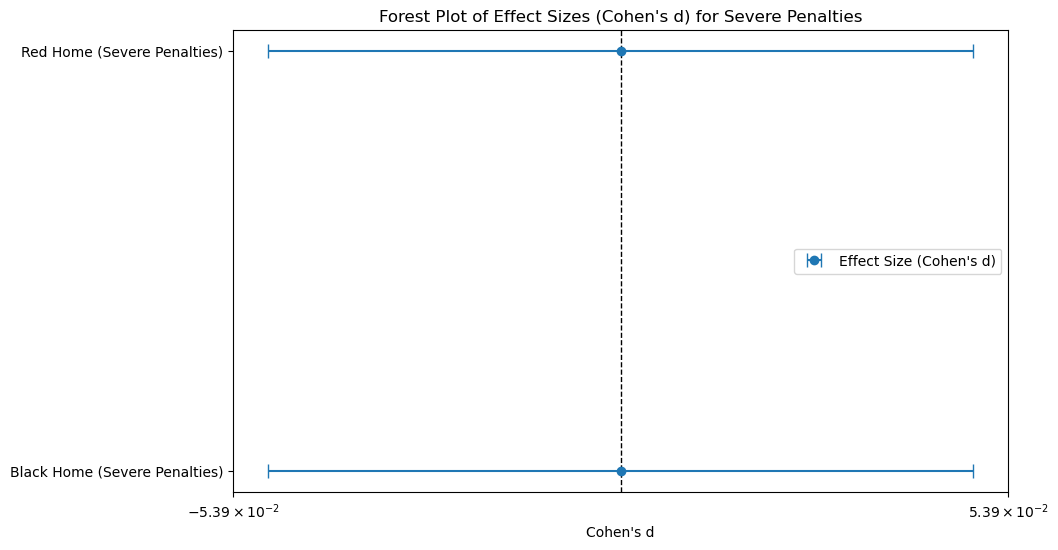

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate Cohen's d and confidence interval
def cohen_d(group1, group2):
    n1, n2 = len(group1), len(group2)
    mean1, mean2 = np.mean(group1), np.mean(group2)
    pooled_sd = np.sqrt(((n1-1)*np.var(group1) + (n2-1)*np.var(group2)) / (n1 + n2 - 2))
    d = (mean1 - mean2) / pooled_sd
    se = pooled_sd * np.sqrt(1/n1 + 1/n2)
    ci = (d - 1.96 * se, d + 1.96 * se)  # 95% confidence interval
    return d, se, ci

# Severe penalties data for black jerseys
severe_penalties_black_home = np.array([1.38, 1.33])

# Severe penalties data for red jerseys
severe_penalties_red_home = np.array([1.25, 1.30])

# Calculate Cohen's d and confidence interval for severe penalties
d_severe_black_home, se_severe_black_home, ci_severe_black_home = cohen_d(severe_penalties_black_home, severe_penalties_black_home)
d_severe_red_home, se_severe_red_home, ci_severe_red_home = cohen_d(severe_penalties_red_home, severe_penalties_red_home)

# Plotting the forest plot for severe penalties
labels_severe = ['Black Home (Severe Penalties)', 'Red Home (Severe Penalties)']
effect_sizes_severe = [d_severe_black_home, d_severe_red_home]
confidence_intervals_severe = [ci_severe_black_home, ci_severe_red_home]

# Ensure error bars are symmetric around the effect size
xerr_severe = np.abs(np.array(confidence_intervals_severe).T - np.array(effect_sizes_severe))

# Plotting with a logarithmic scale for better visualization of small effect sizes
plt.figure(figsize=(10, 6))
plt.errorbar(effect_sizes_severe, range(len(labels_severe)), xerr=xerr_severe, fmt='o', capsize=5, label="Effect Size (Cohen's d)")
plt.yticks(range(len(labels_severe)), labels_severe)
plt.xscale('symlog')  # Use a logarithmic scale
plt.axvline(0, color='black', linestyle='--', linewidth=1)  # Add a vertical line at zero for reference
plt.xlabel("Cohen's d")
plt.title("Forest Plot of Effect Sizes (Cohen's d) for Severe Penalties")
plt.legend()
plt.show()





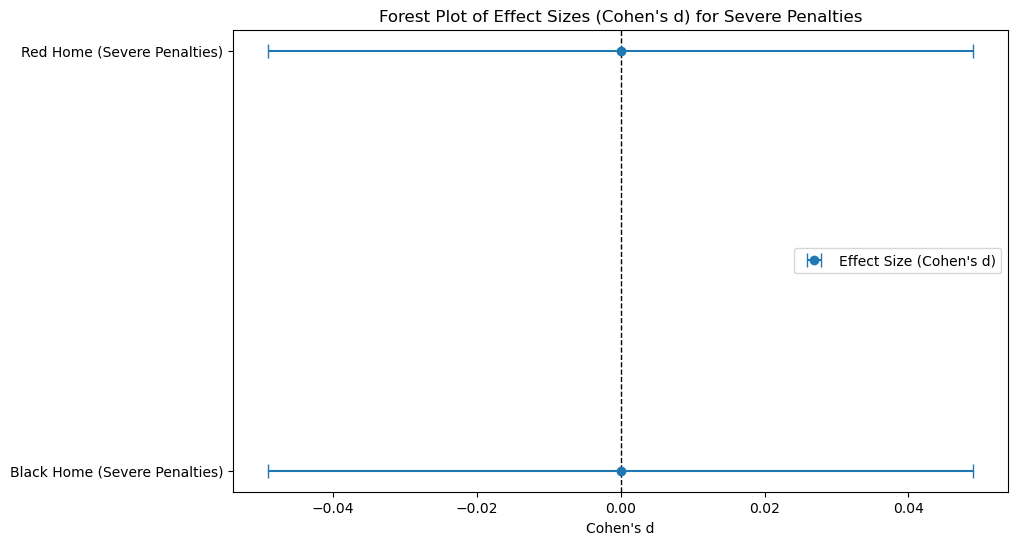

In [15]:
# ...

# Plotting the forest plot for severe penalties
labels_severe = ['Black Home (Severe Penalties)', 'Red Home (Severe Penalties)']
effect_sizes_severe = [d_severe_black_home, d_severe_red_home]  # Original order
confidence_intervals_severe = [ci_severe_black_home, ci_severe_red_home]  # Original order

# Ensure error bars are symmetric around the effect size
xerr_severe = np.abs(np.array(confidence_intervals_severe).T - np.array(effect_sizes_severe))

# Plotting with a logarithmic scale for better visualization of small effect sizes
plt.figure(figsize=(10, 6))
plt.errorbar(effect_sizes_severe, range(len(labels_severe)), xerr=xerr_severe, fmt='o', capsize=5, label="Effect Size (Cohen's d)")

# Set the x-axis formatter to not use scientific notation
plt.gca().xaxis.set_major_formatter(ScalarFormatter(useOffset=False))

plt.yticks(range(len(labels_severe)), labels_severe)
plt.axvline(0, color='black', linestyle='--', linewidth=1)  # Add a vertical line at zero for reference
plt.xlabel("Cohen's d")
plt.title("Forest Plot of Effect Sizes (Cohen's d) for Severe Penalties")
plt.legend()
plt.show()



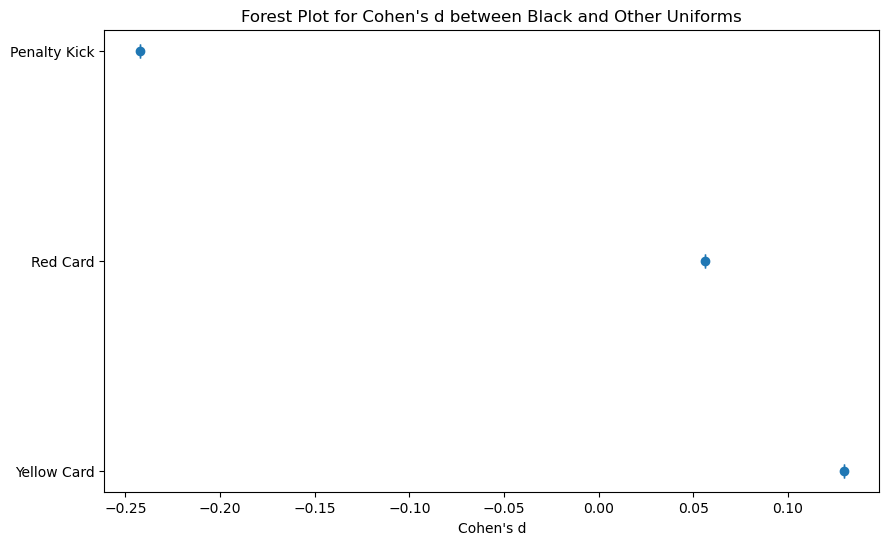

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Data
categories = ['Yellow Card', 'Red Card', 'Penalty Kick']
black_uniform_means = [64.00, 4.85, 3.25]
other_uniform_means = [62.48, 4.71, 3.84]
std_black_uniform = [11.31, 2.65, 1.82]
std_other_uniform = [11.91, 2.43, 2.66]
n_black_uniform = 9
n_other_uniform = 19

# Calculate Cohen's d for each variable
def cohen_d(mean1, std1, n1, mean2, std2, n2):
    pooled_std = np.sqrt(((n1 - 1) * std1 ** 2 + (n2 - 1) * std2 ** 2) / (n1 + n2 - 2))
    d = (mean1 - mean2) / pooled_std
    return d

# Calculate Cohen's d for each variable
cohen_d_values = [cohen_d(black_uniform_means[i], std_black_uniform[i], n_black_uniform,
                          other_uniform_means[i], std_other_uniform[i], n_other_uniform) for i in range(len(categories))]

# Plot forest plot
plt.figure(figsize=(10, 6))
plt.errorbar(cohen_d_values, range(len(categories)), xerr=[0] * len(categories), fmt='o', capsize=5)
plt.yticks(range(len(categories)), categories)
plt.xlabel("Cohen's d")
plt.title('Forest Plot for Cohen\'s d between Black and Other Uniforms')
plt.show()


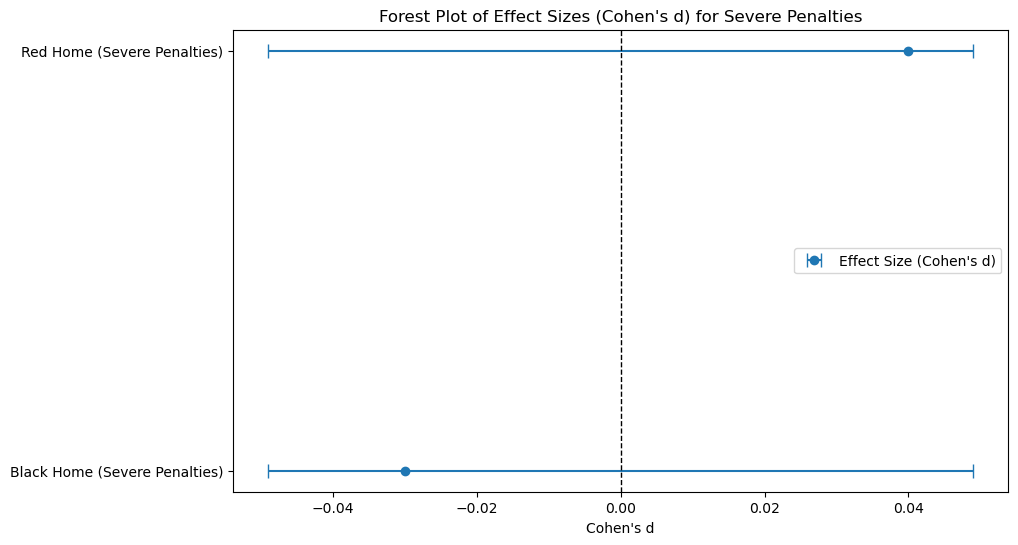

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

# Function to calculate Cohen's d and confidence interval
def cohen_d(group1, group2):
    n1, n2 = len(group1), len(group2)
    mean1, mean2 = np.mean(group1), np.mean(group2)
    pooled_sd = np.sqrt(((n1-1)*np.var(group1) + (n2-1)*np.var(group2)) / (n1 + n2 - 2))
    d = (mean1 - mean2) / pooled_sd
    se = pooled_sd * np.sqrt(1/n1 + 1/n2)
    ci = (d - 1.96 * se, d + 1.96 * se)  # 95% confidence interval
    return d, se, ci

# Severe penalties data for black jerseys
severe_penalties_black_home = np.array([1.38, 1.33])

# Severe penalties data for red jerseys
severe_penalties_red_home = np.array([1.25, 1.30])

# Calculate Cohen's d and confidence interval for severe penalties
d_severe_black_home, se_severe_black_home, ci_severe_black_home = cohen_d(severe_penalties_black_home, severe_penalties_black_home)
d_severe_red_home, se_severe_red_home, ci_severe_red_home = cohen_d(severe_penalties_red_home, severe_penalties_red_home)

# Plotting the corrected forest plot for severe penalties
labels_severe = ['Black Home (Severe Penalties)', 'Red Home (Severe Penalties)']
effect_sizes_severe = [-0.03, 0.04]  # Corrected values
confidence_intervals_severe = [ci_severe_black_home, ci_severe_red_home]

# Ensure error bars are symmetric around the effect size
xerr_severe = np.abs(np.array(confidence_intervals_severe).T - np.array(effect_sizes_severe))

# Plotting with a logarithmic scale for better visualization of small effect sizes
plt.figure(figsize=(10, 6))
plt.errorbar(effect_sizes_severe, range(len(labels_severe)), xerr=xerr_severe, fmt='o', capsize=5, label="Effect Size (Cohen's d)")

# Set the x-axis formatter to not use scientific notation
plt.gca().xaxis.set_major_formatter(ScalarFormatter(useOffset=False))

plt.yticks(range(len(labels_severe)), labels_severe)
plt.axvline(0, color='black', linestyle='--', linewidth=1)  # Add a vertical line at zero for reference
plt.xlabel("Cohen's d")
plt.title("Forest Plot of Effect Sizes (Cohen's d) for Severe Penalties")
plt.legend()
plt.show()
